# GENERATE RANDOM POINT IN THE SKY

### WITHIN 5 DEGREE FROM THE GALACTIC PLANE

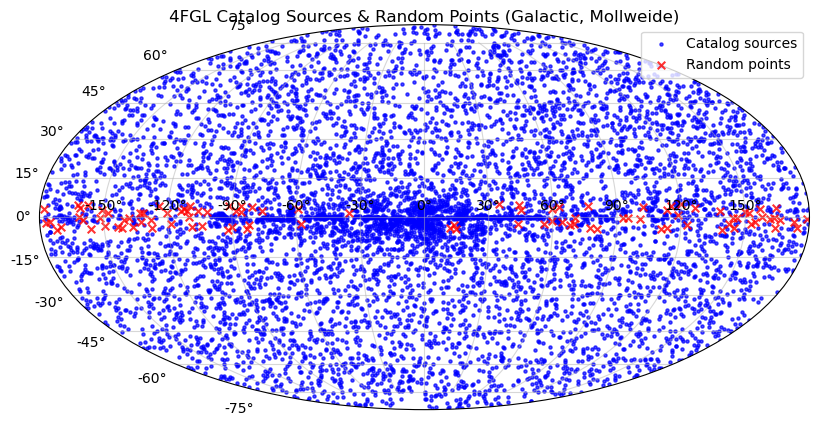

Random points (Galactic) with no 4FGL source within 1.5 deg:
   L [deg]     B [deg]
   149.946       1.997
   247.581       3.055
   279.429       3.991
    43.791      -2.442
   197.583       4.569
    59.484      -1.307
   250.934      -3.872
   184.788      -1.998
    56.137      -2.602
   203.690      -4.529
   145.115      -3.965
   223.614      -3.828
   274.376       2.056
   198.936       3.348
   231.957      -0.918
   241.476      -2.488
    76.745       4.346
   255.854      -3.219
   268.663       4.151
   239.672       1.724
   300.854       2.970
   115.625       4.079
   210.315      -3.207
   164.344      -3.939
   151.590       1.551
   221.873      -0.192
   250.194       4.083
   324.895       1.718
   276.814      -4.483
   166.425      -0.941
   200.216      -0.968
    11.852      -4.119
   189.763      -3.897
   302.388      -2.519
   219.678      -1.197
   208.515      -0.504
   283.819       2.278
    95.300      -0.385
    77.546      -4.008
    80.791      -4.

In [2]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import random
import pandas as pd

# --- 1) Read the FITS catalog ---
with fits.open("/Volumes/Seagate/Magnetar_Project/Diffuse/gll_psc_v35.fit") as hdul:
    data = hdul[1].data  # The first extension (index=1) typically holds the table

# Extract the Galactic longitude and latitude
# Extract the Galactic coords
glon_cat = data["glon"]  # range: 0 to 360 deg
glat_cat = data["glat"]  # range: -90 to +90 deg

# Create a SkyCoord for catalog sources
cat_coords = SkyCoord(l=glon_cat*u.deg, b=glat_cat*u.deg, frame="galactic")

# --- Generate random points in |b| <= 5 deg with no source within 1.5 deg ---
n_points_needed = 100
max_source_dist_deg = 1.5
random_points = []
random_coords = []  # List to store SkyCoord objects for generated points

while len(random_points) < n_points_needed:
    # Random galactic lat in [-5, 5]
    rand_b = random.uniform(-5, 5)
    # Random galactic lon in [0, 360]
    rand_l = random.uniform(0, 360)

    # Create a SkyCoord object for this test point
    test_coord = SkyCoord(l=rand_l * u.deg, b=rand_b * u.deg, frame="galactic")

    # Get separations from all catalog sources
    separations_cat = test_coord.separation(cat_coords)

    # Get separations from already accepted random points
    if random_coords:
        separations_rand = test_coord.separation(SkyCoord(random_coords))
    else:
        separations_rand = np.array([np.inf] * u.deg)  # If first point, no previous ones

    # Ensure it's at least 1.5 degrees away from both catalog sources & existing random points
    if separations_cat.min() > max_source_dist_deg * u.deg and separations_rand.min() > max_source_dist_deg * u.deg:
        random_points.append((rand_l, rand_b))
        random_coords.append(test_coord)  # Store SkyCoord for future checks

# Convert to a DataFrame for CSV output
df = pd.DataFrame(random_points, columns=["Galactic Longitude (deg)", "Galactic Latitude (deg)"])

# Save as CSV
csv_filename = "random_galactic_points.csv"
df.to_csv(csv_filename, index=False)
# --- Convert to arrays for plotting ---
random_points = np.array(random_points)  # shape: (100, 2)

glon_rand = random_points[:, 0]
glat_rand = random_points[:, 1]

# --- Plot: Mollweide projection in Matplotlib ---

# Convert from [0,360) to [-180,180) for LON
# Catalog:
glon_cat_plot = (glon_cat + 180) % 360 - 180
# Random points:
glon_rand_plot = (glon_rand + 180) % 360 - 180

# Convert to radians
lon_cat_rad = np.radians(glon_cat_plot)
lat_cat_rad = np.radians(glat_cat)
lon_rand_rad = np.radians(glon_rand_plot)
lat_rand_rad = np.radians(glat_rand)

# Create the figure
plt.figure(figsize=(10, 5))

ax = plt.subplot(111, projection="mollweide")
# Plot catalog sources (blue dots)
ax.scatter(lon_cat_rad, lat_cat_rad, s=5, c="blue", alpha=0.7, label="Catalog sources")
# Plot random points (red crosses)
ax.scatter(lon_rand_rad, lat_rand_rad, s=30, c="red", marker="x", alpha=0.8, label="Random points")

# Add grid, legend, title
ax.grid(True, alpha=0.5)
ax.legend(loc="upper right")
ax.set_title("4FGL Catalog Sources & Random Points (Galactic, Mollweide)", pad=1.02)

plt.show()
    
# --- 4) Print or save the results ---
print("Random points (Galactic) with no 4FGL source within 1.5 deg:")
print("   L [deg]     B [deg]")
for (l_val, b_val) in random_points:
    print(f"{l_val:10.3f}  {b_val:10.3f}")

### EXCLUDING 10 DEGREE FROM THE GALACTIC PLANE

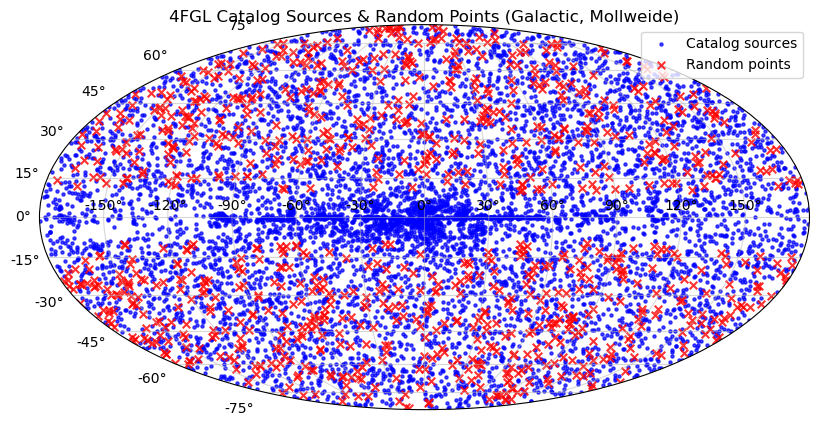

Random points (Galactic) with no 4FGL source within 1.5 deg:
   L [deg]     B [deg]
   229.413     -76.760
   350.143      63.704
   269.466     -17.213
   125.632      27.307
   340.239     -27.281
   337.191     -76.341
    90.346     -79.674
   304.455     -40.108
    87.389      69.741
   247.119     -12.083
   217.469     -46.408
   204.929      15.352
   255.247      31.987
   197.468      35.160
    73.876     -16.242
    35.272      42.937
   240.764     -17.748
   299.618      30.243
   307.612      64.614
   149.786     -45.241
   148.460     -40.483
   274.951      15.835
    83.057      48.777
     5.199      52.720
    78.911      54.428
   228.268      39.675
   217.191     -47.505
    16.711      54.760
   230.138      47.120
   280.497     -11.642
   177.021     -22.657
   292.729      10.958
   241.698      24.995
   281.514      24.451
    64.692     -61.780
   141.866     -37.220
    74.491      11.199
   226.215     -72.003
   224.806      34.501
   330.453     -43.

In [1]:
#!/usr/bin/env python3

import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import random

# --- 1) Read the FITS catalog ---
with fits.open("/Volumes/Seagate/Magnetar_Project/Diffuse/gll_psc_v35.fit") as hdul:
    data = hdul[1].data  # The first extension (index=1) typically holds the table

# Extract the Galactic longitude and latitude
# Extract the Galactic coords
glon_cat = data["GLON"]  # range: 0 to 360 deg
glat_cat = data["GLAT"]  # range: -90 to +90 deg

# Create a SkyCoord for catalog sources
cat_coords = SkyCoord(l=glon_cat*u.deg, b=glat_cat*u.deg, frame="galactic")

# --- Generate random points in |b| <= 5 deg with no source within 1.5 deg ---
n_points_needed = 1000
max_source_dist_deg = 1.5

sin_b_min = np.sin(np.radians(-90))
sin_b_max = np.sin(np.radians(90))

random_points = []
n_found = 0

while n_found < n_points_needed:
    rand_sin_b = random.uniform(sin_b_min, sin_b_max)
    rand_b = np.degrees(np.arcsin(rand_sin_b))    # Random galactic lon in [0, 360]
    rand_l = random.uniform(0, 360)
    
    # Create a SkyCoord
    test_coord = SkyCoord(l=rand_l*u.deg, b=rand_b*u.deg, frame="galactic")
    
    # Get separations from all catalog sources
    separations = test_coord.separation(cat_coords)
    
    # If min separation > 1.5 deg, we accept it
    if abs(rand_b)>10 and separations.min() > max_source_dist_deg * u.deg:
        random_points.append((rand_l, rand_b))
        n_found += 1

# --- Convert to arrays for plotting ---
random_points = np.array(random_points)  # shape: (100, 2)
glon_rand = random_points[:, 0]
glat_rand = random_points[:, 1]

# --- Plot: Mollweide projection in Matplotlib ---

# Convert from [0,360) to [-180,180) for LON
# Catalog:
glon_cat_plot = (glon_cat + 180) % 360 - 180
# Random points:
glon_rand_plot = (glon_rand + 180) % 360 - 180

# Convert to radians
lon_cat_rad = np.radians(glon_cat_plot)
lat_cat_rad = np.radians(glat_cat)
lon_rand_rad = np.radians(glon_rand_plot)
lat_rand_rad = np.radians(glat_rand)

# Create the figure
plt.figure(figsize=(10, 5))

ax = plt.subplot(111, projection="mollweide")
# Plot catalog sources (blue dots)
ax.scatter(lon_cat_rad, lat_cat_rad, s=5, c="blue", alpha=0.7, label="Catalog sources")
# Plot random points (red crosses)
ax.scatter(lon_rand_rad, lat_rand_rad, s=30, c="red", marker="x", alpha=0.8, label="Random points")

# Add grid, legend, title
ax.grid(True, alpha=0.5)
ax.legend(loc="upper right")
ax.set_title("4FGL Catalog Sources & Random Points (Galactic, Mollweide)", pad=1.02)

plt.show()
    
# --- 4) Print or save the results ---
print("Random points (Galactic) with no 4FGL source within 1.5 deg:")
print("   L [deg]     B [deg]")
for (l_val, b_val) in random_points:
    print(f"{l_val:10.3f}  {b_val:10.3f}")